# **Project Name**    -**Netflix Movies and Tv shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member**    - Shefali Wankhade

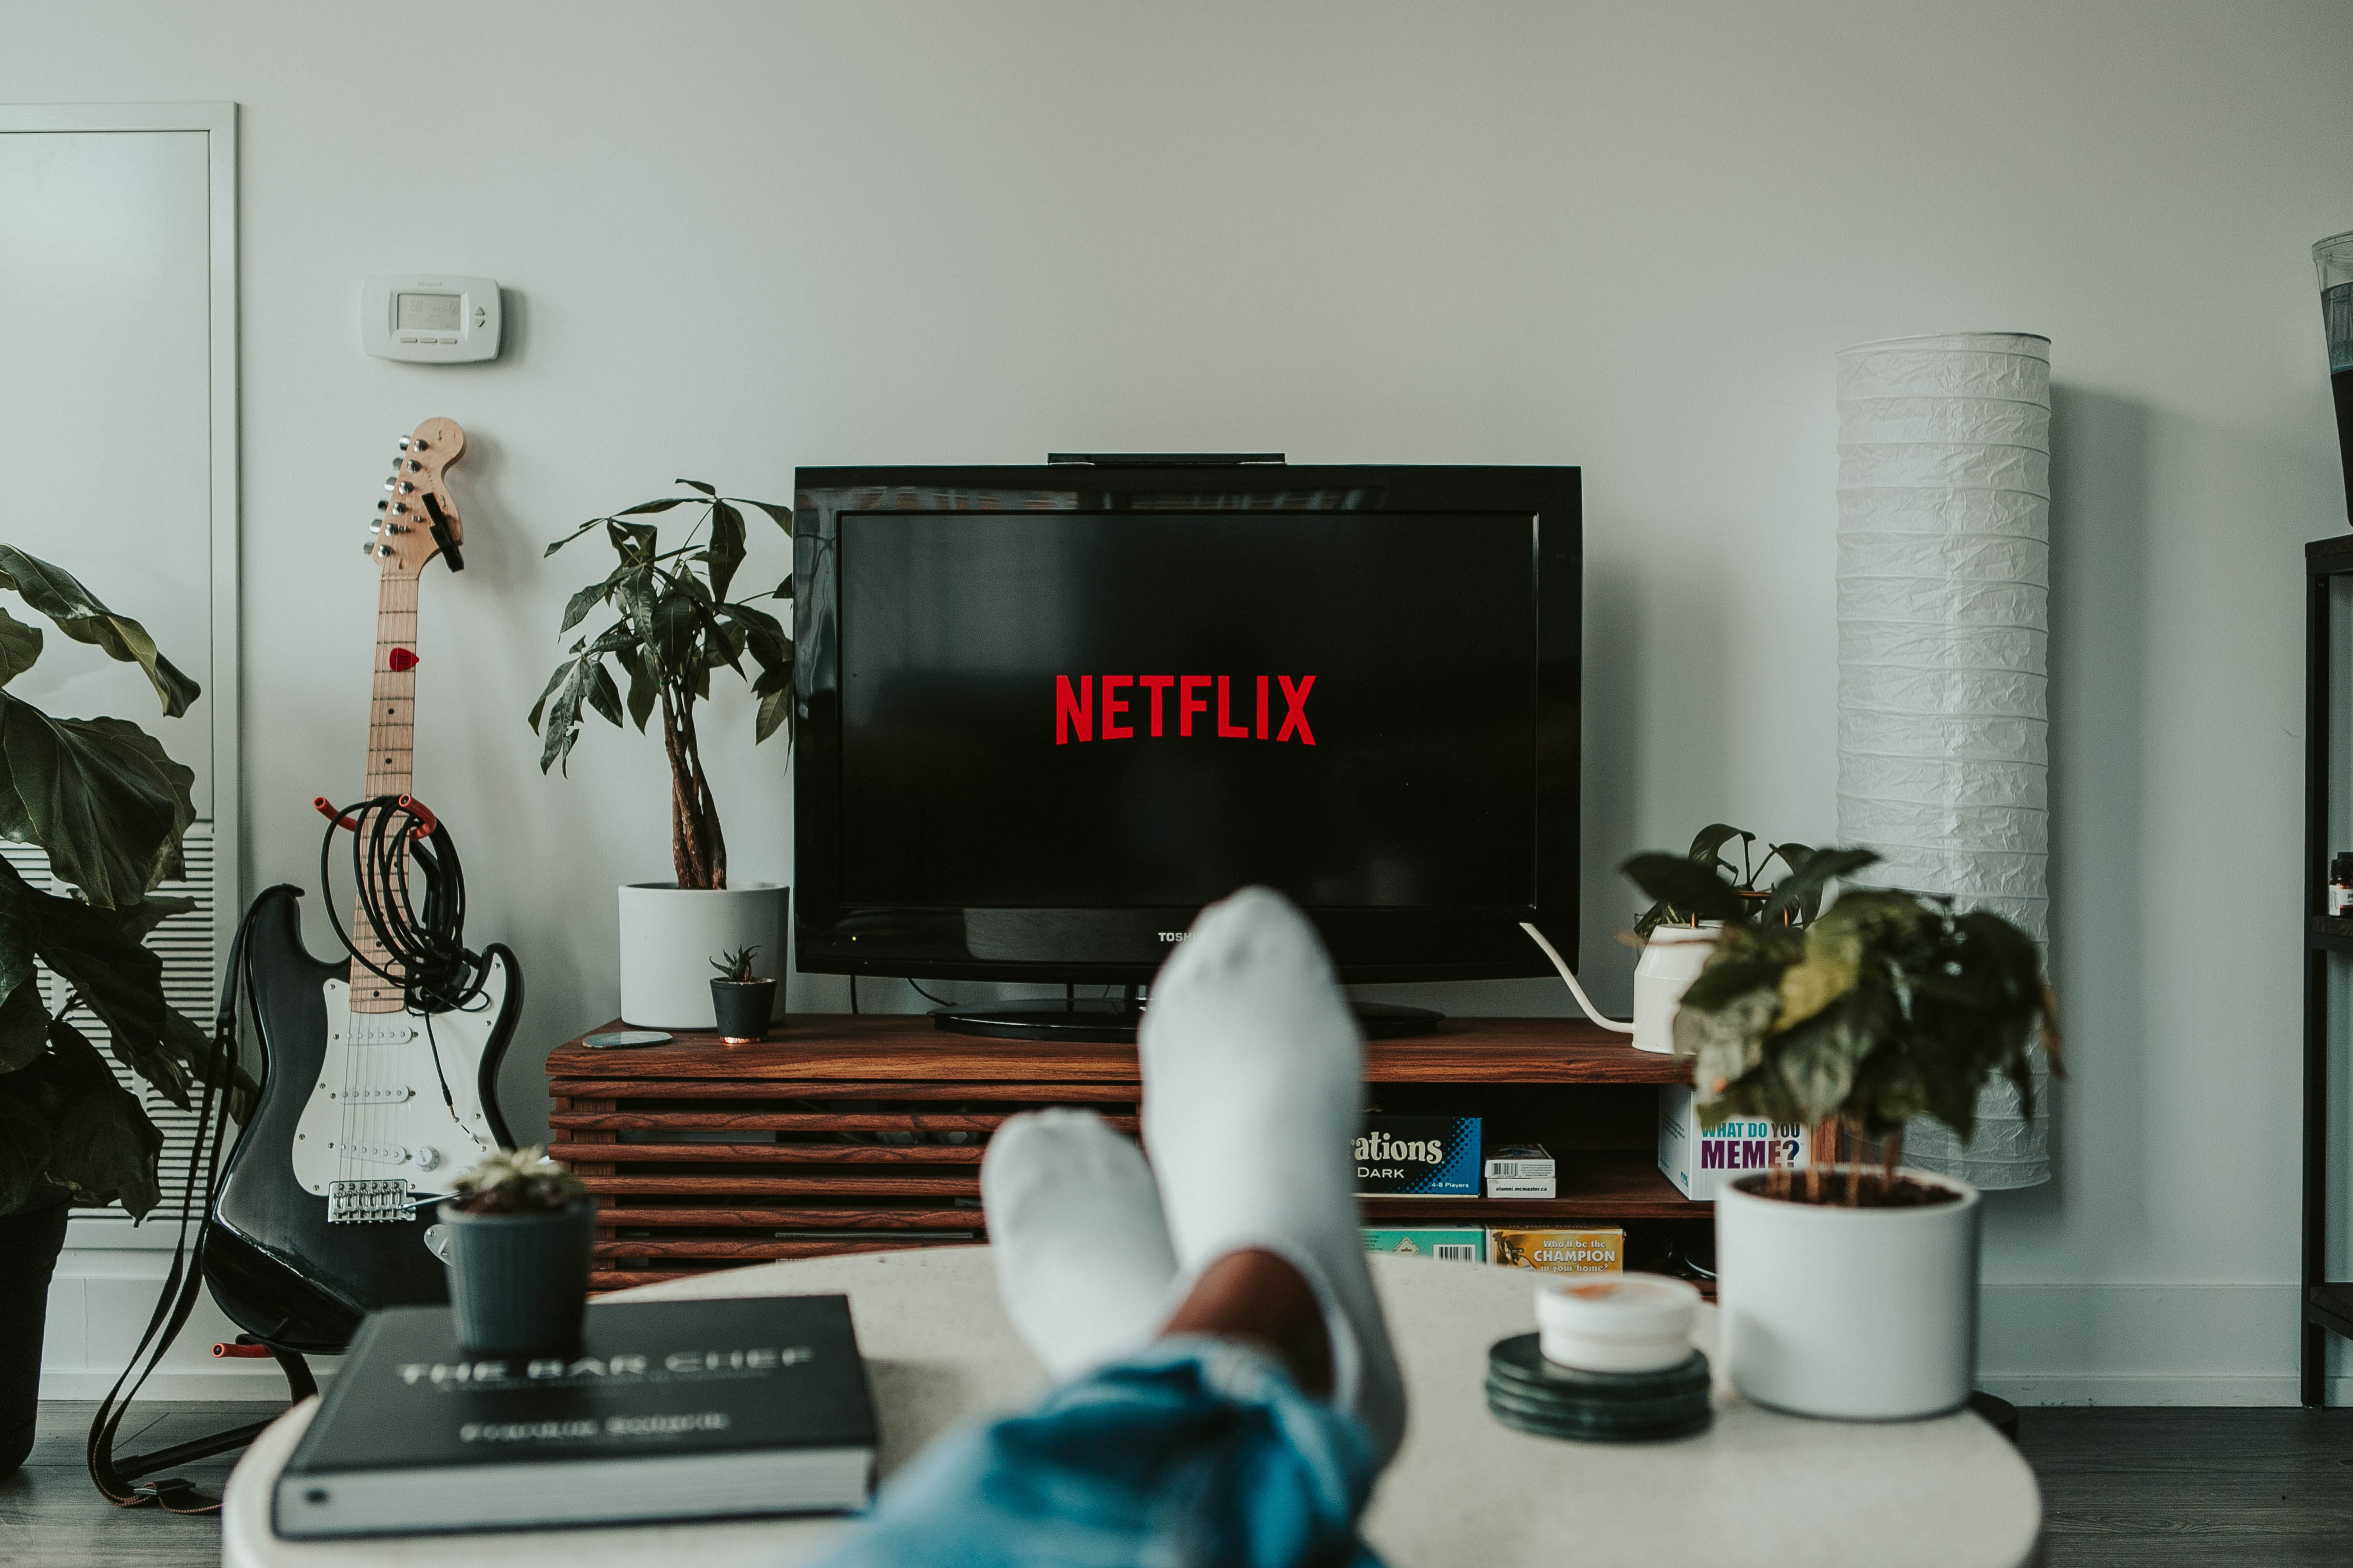

# **Project Summary -**


This project is aimed at conducting a comprehensive analysis of Netflix's extensive library of movies and TV shows, sourced from the Flixable search engine. The primary goal is to categorize these titles into meaningful clusters, with the ultimate aim of enhancing user engagement and reducing subscriber turnover for Netflix, a leading online streaming service with over 220 million subscribers as of the second quarter of 2022.

The dataset comprises approximately 7,787 records with 11 attributes. The initial steps involve addressing missing data points and performing exploratory data analysis (EDA) procedures to gain insights.

The core of this clustering project revolves around six key attributes: cast, country, genre, director, rating, and description. To facilitate clustering, the TFIDF vectorizer is used to tokenize, preprocess, and transform the data in these attributes into vectorized representations.

To manage the challenge posed by high dimensionality, Principal Component Analysis (PCA) is employed to reduce the feature space while retaining essential information.

A variety of techniques, including the elbow method, silhouette score assessment, dendrogram visualization, and others, are employed to construct two distinct types of clusters. K-Means Clustering is applied to one cluster, while the Agglomerative Hierarchical clustering algorithm is used for the other. Determining the optimal number of clusters is a crucial step in this process.

The creation of a similarity matrix through cosine similarity computation lays the foundation for a content-based recommender system. This system leverages similarities among different titles to provide personalized recommendations to users based on their past viewing preferences. As a result, users receive ten tailored recommendations aligned with their content consumption habits.

In summary, this project delves into Netflix's vast entertainment offerings, utilizing advanced techniques to reveal insights and trends that are vital in the streaming entertainment landscape. The analysis culminates in the formation of distinct clusters and the development of a sophisticated recommender system, all aimed at enriching the streaming experience for Netflix's diverse audience.

# **GitHub Link -**

https://github.com/Shefali2104/My-projects.git

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
My Task is to make a Model that can cluster similar type of content together.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [66]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from google.colab import drive
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [67]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
file_path = '/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)


### Dataset First View

In [69]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [70]:
# Dataset Rows & Columns
print(df.columns)
rows = df.shape[0]
columns = df.shape[1]
print (f'The rows are {rows} and The  columns sre {columns} ')

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
The rows are 7787 and The  columns sre 12 


### Dataset Information

In [71]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [72]:
# Dataset Duplicate Value Count
print ( f'In this Dataset there are {len(df[df.duplicated()])} duplicate values')

In this Dataset there are 0 duplicate values


#### Missing Values/Null Values

In [73]:
# Missing Values/Null Values Count
Null_count = df.isnull().sum()
Null_count

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


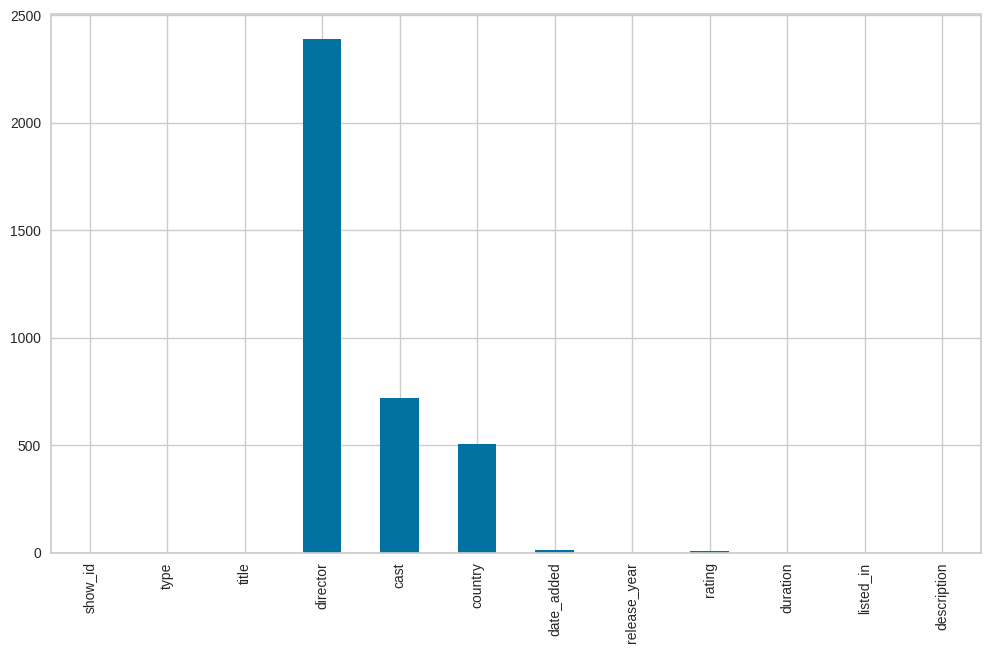

In [74]:
# Visualizing the missing values
df.isnull().sum().plot.bar()
plt.show()

### What did you know about your dataset?

The dataset contains 7787 rows and 12 columns. Netflix shows is classified as "tv shows," "movie shows,".

 we have unique show_ids like "s1, "s2," and so on which represents unique ids of the show. We have title of the show, such as "Rich in Love,etc" as well as its director and cast, which refers to the show diretors and actors that played the show's characters.

 There are 681 nations from which netflix sourced content. The date column states that when movie was added to Netflix, when the year it was released, and its rating are all listed. With 419 different sorts of listed shows (including foreign TV shows, romantic comedies, thrillers, and more), 216 unique values total, including descriptions of both shows and 216 different types of durations in a single season, number of minutes.

 There are no Duplicate values  in this dataset and the null values are as follow
 * director        2389
 * cast             718
 * country          507
 * date_added        10
 * rating             7

## ***2. Understanding Your Variables***

In [75]:
# Dataset Columns

print(f'there are { df.shape[1]} columns and they are as follow {df.columns}')

there are 12 columns and they are as follow Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [76]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

This dataset has total 7787 rows and 12 columns:

The columns description as follow:
1. Show_id : show ID

2. type : Type of the show like movie or TV show

3. title : Title of the show

4. director : Director of the show

5. cast : Actors and actress of the show

6. country : Country of the origin of the show

7. date_added : Date when the show added to netflix

8. release_year : Release year

9. rating : rating

10. duration : duration of the show

11. listed_in : Listed in

12. description : Description of the show

### Check Unique Values for each variable.

In [77]:
# Check Unique Values for each variable.
df.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

In [78]:
# Write your code to make your dataset analysis ready.
# Write your code to make your dataset analysis ready
# Netflix Wrangling Class for data wrangling
class NetflixWrangling:
    # Init function
    def __init__(self,df):
      ''' init method '''
      try:
          self.df = df.copy()
          self.df['duration_value'] = self.df['duration'].apply(self.set_duration_value)
          self.df['duration_unit'] = self.df['duration'].apply(self.set_duration_unit)
          self.cast_ = self.get_cast_or_listed_in('cast')
          self.genres_ = self.get_cast_or_listed_in('listed_in')
          self.directors_ = self.getTopValues('director')
          self.countries_ = self.getTopValues('country')
          self.release_years_ = self.getTopValues('release_year')
          self.ratings_ = self.getTopValues('rating')
          self.df['duration_value'] = self.df['duration_value'].apply(lambda x:int(x))

      except:
          print('Invalid input!')
    # Function to get dataset
    def get_df(self):
      ''' Function returns dataframe '''
      return self.df
    # Function to get movies dataset
    def getMovies(self):
      ''' Function returns returns dataframe which contains data of movies '''
      return self.df[self.df['type'] == 'Movie']
    # Function to get TV Show's dataset
    def getTvShows(self):
      ''' Function returns dataframe which contains data of tv shows '''
      return self.df[self.df['type'] == 'TV Show']
    # Function to get top values
    def getTopValues(self,col):
      ''' Function returns top values for the given column '''
      try:
          return self.df[col].value_counts().sort_values(ascending=False)
      except:
          return 'You have entered invalid column!'
    # Function to set duration value
    def set_duration_value(self,string):
      ''' Function for setting duration values '''
      if string[-7:] == 'Seasons':
        return string[:-8]
      elif string[-6:] == 'Season':
        return string[:-7]
      else:
        return string[:-4]

    # Function to set duration unit
    def set_duration_unit(self,duration):
      ''' function for setting duration unit. '''
      if (duration[-7:] == 'Seasons') | (duration[-6:] == 'Season'):
        return 'season'
      else:
        return 'min'

    # Function to get cast or genres
    def get_cast_or_listed_in(self,col):
        df = self.df.copy()
        # internal function 1
        def __get_list():
            '''
            takes dataset and column's name, returns list.
            '''
            list_1=[]
            for i in df[df[col].isna()== False][col]:
                list_1.append(i.split(', '))
            return list_1
          # internal function 2
        def __get_list_vars(list_1):
            list_2 = []
            for i in list_1:
              for j in i:
                list_2.append(j)
            return list_2

          # internal function 3
        def __get_dict_vars(list_2):
            unique_var = set(list_2)
            dict_of_vars = dict()
            for i in unique_var:
              dict_of_vars[i] = list_2.count(i)
            return dict_of_vars
        # Assigning values in list 1 and list 2 then returning the series
        list_1 = __get_list()
        list_2 = __get_list_vars(list_1)
        return pd.Series(__get_dict_vars(list_2)).sort_values(ascending=False)

    # Function for converting duration_value into int type
    def convertInt(self,col):
      ''' Function to convert other type into integer '''
      return int(col)

    # Get showsPerMonth
    def getShowsPerMonth(self,typ='all'):
      ''' Function which returns Shows per month '''
      df = pd.DataFrame()
      if typ == 'tv':
          df = self.getTvShows()
      elif typ == 'movie':
          df = self.getMovies()
      else:
          df = self.df.copy()
      df = df[df['date_added'].isna() == False]
      df['added_month'] = df['date_added'].apply(lambda x:x.split()[0])
      monthly_shows = df['added_month'].value_counts()
      return monthly_shows

    # Get Text Length
    def getTextLength(self,text):
      return len(text)
    # Get Dataframe with length column
    def getDfWithLength(self,col):
      df = self.df.copy()
      df['text_length'] = df[col].apply(self.getTextLength)
      return df

# Initializing the object
netflixWrangling = NetflixWrangling(df)

In [79]:
df["type"].value_counts()

,count
type,
Movie,5377
TV Show,2410


In [80]:
# top count of show from top ten country
df["country"].value_counts().head(10)

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101


In [81]:
# Printing the shapes for each type of shows
print('Data for Movies has shape :',netflixWrangling.getMovies().shape)
print('')
print('Data for TV shows has shape :',netflixWrangling.getTvShows().shape)
print('')

Data for Movies has shape : (5377, 14)

Data for TV shows has shape : (2410, 14)



In [82]:
# Total length for each type of durations
netflixWrangling.get_df().groupby(['duration_unit'])['duration_value'].sum()

,duration_value
duration_unit,
min,533979
season,4280


In [83]:
# Total number of Shows for each month
print('Total number of Shows for each month')
netflixWrangling.getShowsPerMonth()

Total number of Shows for each month


,count
added_month,
December,833
October,785
January,757
November,738
March,669
September,619
August,618
April,601
July,600


In [84]:
# Total number of Movies for each month
print('Total number of Movies for each month')
netflixWrangling.getShowsPerMonth('movie')

Total number of Movies for each month


,count
added_month,
January,560
December,554
October,553
November,511
March,471
April,420
September,415
August,414
July,403


In [85]:
# Total number of TV Shows for each month
print('Total number of TV Shows for each month')
netflixWrangling.getShowsPerMonth('tv')

Total number of TV Shows for each month


,count
added_month,
December,279
October,232
November,227
August,204
September,204
March,198
July,197
January,197
April,181


In [86]:
# Assigning top 5 actors and genres to a variable
print('Top 5 actors with highest number of shows :')
netflixWrangling.cast_.head()

Top 5 actors with highest number of shows :


,0
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,30
Om Puri,30
Takahiro Sakurai,29


In [87]:
# Top 5 directors with highest number of shows
print('Top 5 directors with highest number of shows :')
netflixWrangling.directors_.head()

Top 5 directors with highest number of shows :


,count
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12


In [88]:
# Top 5 countries with highest number of shows
print('Top 5 countries with highest number of shows :')
netflixWrangling.countries_.head()

Top 5 countries with highest number of shows :


,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183


In [89]:
# Top 5 years with highest number of shows released
print('Top 5 years with highest number of shows released:')
netflixWrangling.release_years_.head()

Top 5 years with highest number of shows released:


,count
release_year,
2018,1121
2017,1012
2019,996
2016,882
2020,868


In [90]:
# Top ratings with highest number of shows
print('Top ratings with highest number of shows :')
netflixWrangling.ratings_

Top ratings with highest number of shows :


,count
rating,
TV-MA,2863
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194


In [91]:
# Top 5 Genres with highest number of Movies/TV Shows
print('Top 5 Genres with highest number of Movies/TV Shows')
netflixWrangling.genres_.head()

Top 5 Genres with highest number of Movies/TV Shows


,0
International Movies,2437
Dramas,2106
Comedies,1471
International TV Shows,1199
Documentaries,786


In [92]:
# Top 10 directors with highest length of descriptions
print('Top 10 Directors with highest length of descriptions')
netflixWrangling.getDfWithLength('description').groupby('director')['text_length'].mean().sort_values(ascending=False).reset_index().head(10)

Top 10 Directors with highest length of descriptions


,director,text_length
0,Chia Tang,246.0
1,Gene Quintano,244.0
2,Chris Koch,243.0
3,N. Chandra,241.0
4,Daniel Lee,240.0
5,Kevin Reynolds,239.0
6,Jeffrey W. Byrd,231.0
7,Marek Kanievska,230.0
8,Shawn Arranha,221.0
9,Esteban Sapir,220.0


### What all manipulations have you done and insights you found?

1. First of I assigned all movies' data to a variable and TV shows' data to another variable and made a class which is responsible of extracting data from string and also made 2 functions for getting duration values and units.


2. Directors with highest number of movies/tv shows are Raúl Campos and Jan Suter : 18

3. Top 5 countries produced highest number of movies are :

   United States : 2555

   India : 923

   United Kingdom : 397

   Japan : 226
   
   South Korea : 183


4. Highest movies produced in year 2018 : 1121

5. Rating for highest number of movie is TV-MA : 2863

6. Top 5 actors with highest number of movies are :


  Anupam Kher : 42

  Shah Rukh Khan : 35

  Naseeruddin Shah : 30

  Om Puri : 30

   Akshay Kumar : 29


7. Top genres with highest number of movies are :

  International Movies : 2437

  Dramas : 2106


8. Total Seasons : 4280 and Total Minutes : 533979.

9. Number of TV Shows/Movies for each month

December : 833

October : 785

January : 757

November : 738

March : 669

September : 619

August : 618

April : 601

July : 600

May : 543

June : 542

February : 472

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [93]:
# Class for visualization
class NetflixVisualization(NetflixWrangling):
    bar_colors = ['violet','indigo','blue','g','yellow','orange','r']
    # Init method
    def __init__(self,df):
      ''' Init method '''
      self.df = df
      self.df_tv = df[df['type'] == 'Tv_shows']

    # Bar chart for value counts
    def countBar(self,col,typ='default',top=10):
      ''' Function to display top most values for a given column'''
      try:
        if typ == 'tv':
          df = self.getTvShows()
        elif typ == 'movie':
          df = self.getMovies()
        else:
          df = self.df.copy()
        df[col].value_counts().sort_values(ascending=False)[:top].plot.bar(color=self.bar_colors,figsize=(15,5))
        plt.title('Number of shows for top '+str(top)+" "+col)
        plt.xlabel(col)
        plt.ylabel('counts')
        plt.show()
      except:
        print('Invalid Input...')

    # Barh chart for value counts
    def countBarh(self,col,typ='default',top=10):
      ''' Function to display top most values for a given column '''
      try:
        if typ == 'tv':
          df = self.getTvShows()
        elif typ == 'movie':
          df = self.getMovies()
        else:
          df = self.df.copy()
        df[col].value_counts().sort_values(ascending=False)[:top].plot.barh(color=self.bar_colors,figsize=(13,5))
        plt.title('Number of shows for top '+str(top)+" "+col)
        plt.xlabel('counts')
        plt.ylabel(col)
        plt.show()
      except:
        print('Invalid Input...')

    # Chart 1 - Function shows contents counts for each type
    def chart_1(self):
      ''' Function shows contents counts for each type  '''
      self.df['type'].value_counts().plot.pie(figsize=(7,7),
                                                  colors={'cyan','coral'},
                                                  shadow=True,explode=[0.03,0.03],
                                                  autopct='%0.01f%%')
      plt.show()

    # Chart 2 - Bar chart shows top countries with highest number of shows
    def chart_2(self,typ='default',top=10):
      ''' Function shows top countries with highest number of shows '''
      self.countBar('country',typ,top)


    # Chart 3 - Bar chart,directors for TV shows
    def chart_3(self,typ='default',top=10):
      ''' Function shows top directors with highest number of shows '''
      self.countBar('director',typ,top)


    # chart 4 - Function shows top release with highest number of shows
    def chart_4(self,typ='default',top=10):
      ''' Function shows top release year with highest number of shows '''
      self.countBar('release_year',typ,top)

     # Chart 5 - shows top ratings with highest number of shows
    def chart_5(self,typ='default',top=10):
      ''' Function shows top ratings with highest number of shows '''
      if typ == 'movie':
        plt.xticks(np.arange(0,1851,100))
        self.countBarh('rating',typ,top)
      else:
        plt.yticks(np.arange(0,1201,100))
        self.countBar('rating',typ,top)


    # Chart 6- shows top listed in with highest number of shows
    def chart_6(self,typ='default',top=10):
      ''' Function shows top listed_in with highest number of shows '''
      plt.xticks(np.arange(0,400,10))
      self.countBarh('listed_in',typ,top)
    # Method to get top  values for the given column
    def getTopBarh(self,col):
      ''' Function shows top 5 values for a given column '''
      x = self.get_cast_or_listed_in(col).head()
      x.plot.barh(color= self.bar_colors)
      plt.title('Top 5 '+col)
      plt.xlabel('count of movies/tv shows')
      plt.ylabel(col)
      plt.show()

# Initializing the object
netflixVisualization = NetflixVisualization(df)

Here i created specific functions for visualization part so i don't have to use different codes with every other chart.


#### Chart - 1)Value counts for each type

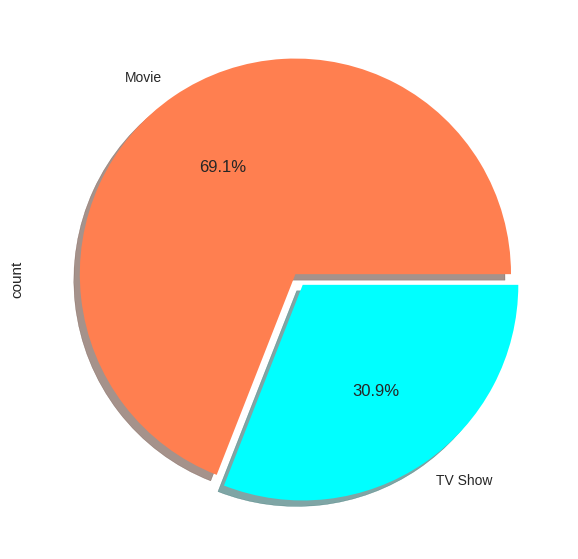

In [94]:
# Chart - 1 visualization code
# value counts for each type
netflixVisualization.chart_1()

##### 1. Why did you pick the specific chart?

A pie chart is a type of graph that represents the data in the circular graph. The slices of pie show the relative size of the data, and it is a type of pictorial representation of data. A pie chart requires a list of categorical variables and numerical variables.Pie chart expresses part to whole relationship with the data so I picked this chart to see percentage of TV shows and movies the in dataset.

##### 2. What is/are the insight(s) found from the chart?

As for the pie chart you can see that 69.1% are movies and 30.9% are the tv shows. so the most of the content on netflix is movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This help us to understand how the market is going in the means of competion. Also it shows how the new release of you shows or the movie.

#### Chart - 2)Top 10 countries with highest number of shows

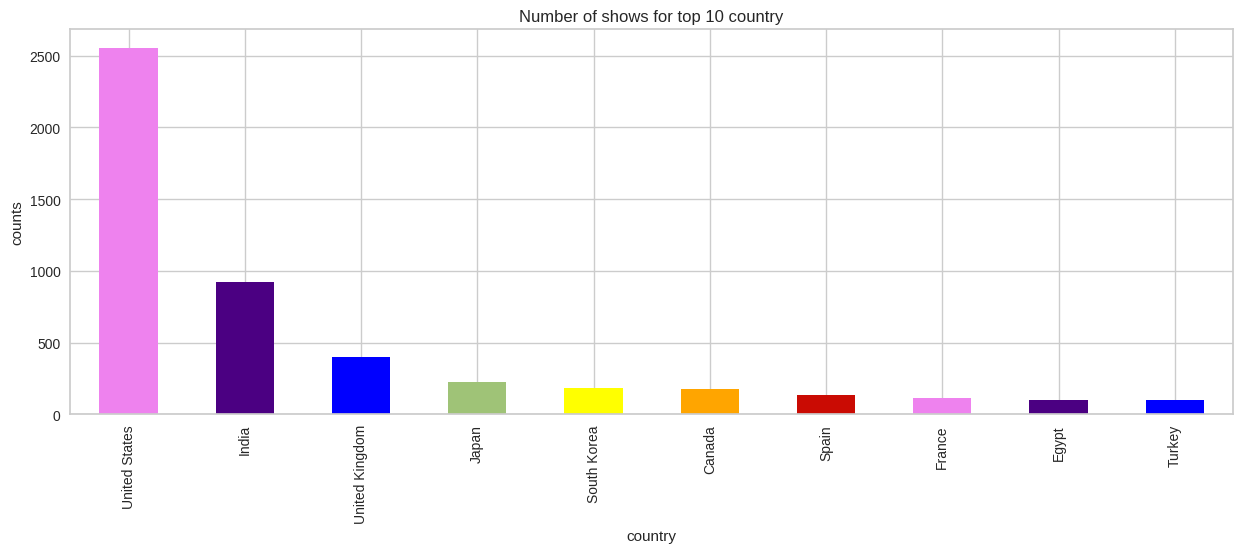

In [95]:
# Chart - 2 visualization code
#Top 10 countries with highest number of shows
netflixVisualization.chart_2()

##### 1. Why did you pick the specific chart?

 A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. A bar chart is used for the representation of categoriacal variables.
A bar chart show value counts or frequency of the data for different columns and I picked this chart to see which are top 10 countries producing highest number of movies/tv shows.

##### 2. What is/are the insight(s) found from the chart?

From the graph you can that most of the movies are produced in the united states and 2nd most movies are produced in the india and then after is United kingdom.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It can help you to understand the movies  producing in which contries can sell good netflix movies.

#### Chart - 3)Top 10 directors with highest number of TV shows

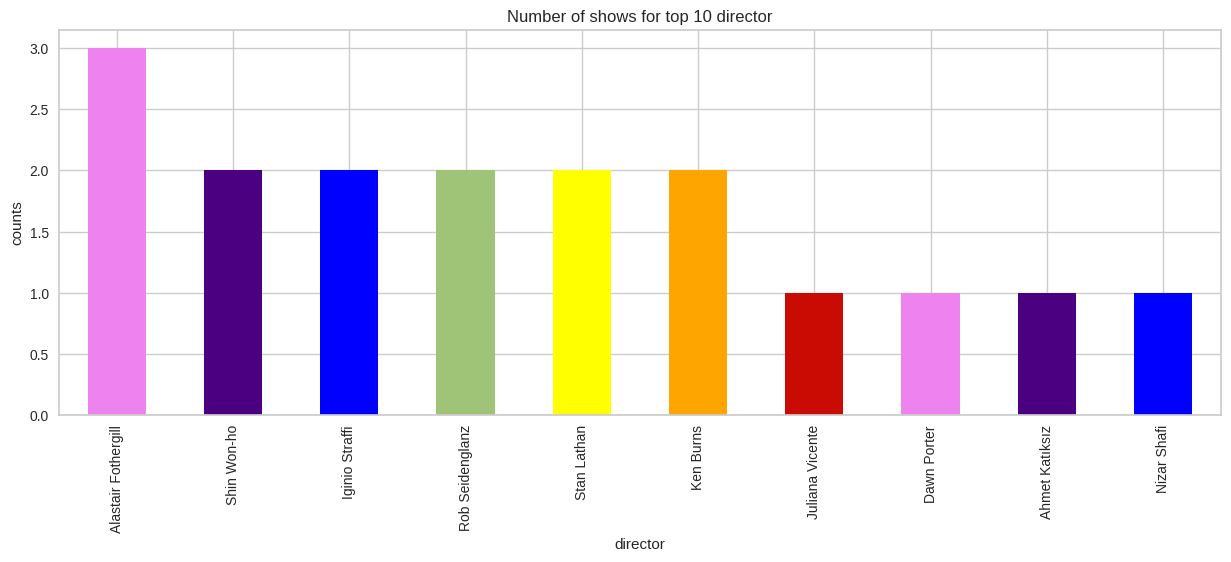

In [96]:
# Chart - 3 visualization code
#Top 10 directors with highest number of TV shows
netflixVisualization.chart_3('tv')

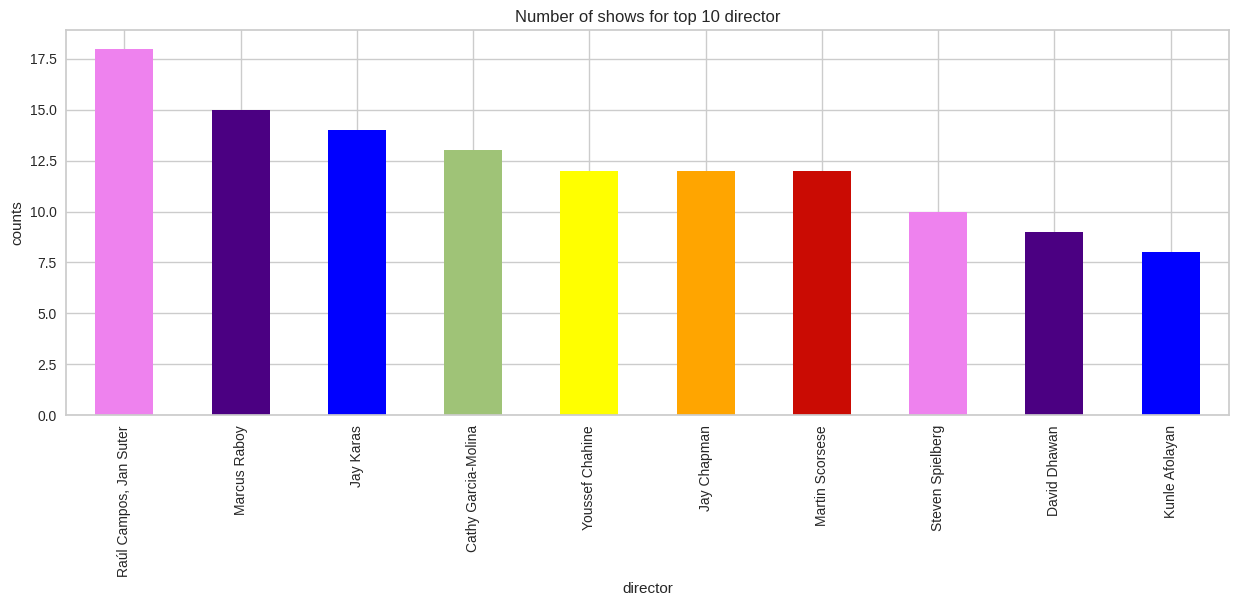

In [97]:
# Top 10 directors with highest number of Movies
netflixVisualization.chart_3('movie')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.
So, for representing the director and Movie/TVshows count i used bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the about two chart you can see that most Movies are craeted by the Director
* Raúl Campos and Jan Suter : 18 movies.
And the most Tvshows are
* Alastair Fothergill : 3 TV shows.
For further you can there are others Directors who made the Movies/TVshows they are in the Chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Maximum 3 TV Shows are produced by 1 director in other side maximum number of movies are 18 that is 6 times greater than TV shows.

 Movies are more in demand than TV shows becacuse most of the movies shows the ending part quickly and on other hand it takes much time to finish the TV shows completly.

#### Chart - 4)Top 5 release year with highest number of Movies

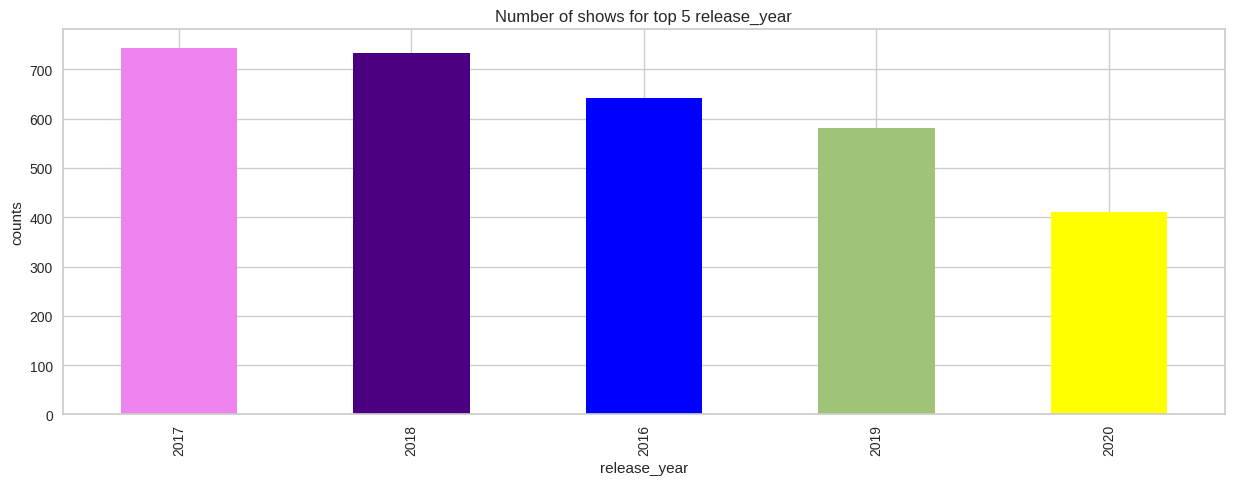

In [98]:
# Chart - 4 visualization code
#Top 5 release year with highest number of Movies
netflixVisualization.chart_4('movie',top=5)

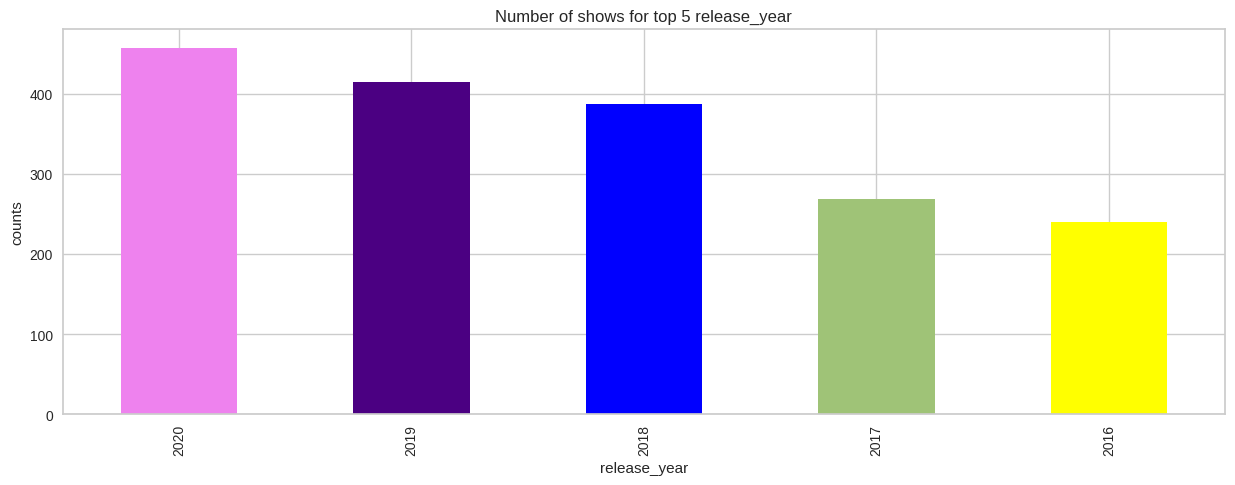

In [99]:
#Top 5 release year with highest number of TV shows
netflixVisualization.chart_4('tv',top=5)

##### 1. Why did you pick the specific chart?

Bar chart is used to show the relationship between the categorical variables in distict mannar.
For representing the relation between Movie/TVshows years vs the Movie/TVshows count i used the Bar chart.

##### 2. What is/are the insight(s) found from the chart?

As you see that the most of the TVshows are released in 2017 And most Movies are released in 2020
for other count of the movies/tvshows per year some are near the 800 and 500 respectively.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The year 2017 saw the release of the highest number of movies, while in 2020, the number of TV shows released was notably higher. This trend can be attributed to the efficiency of TV show production, which allows for earlier filming and release, as opposed to the lengthier production process of movies.

#### Chart - 5)Top 5 rating with highest number of Movies

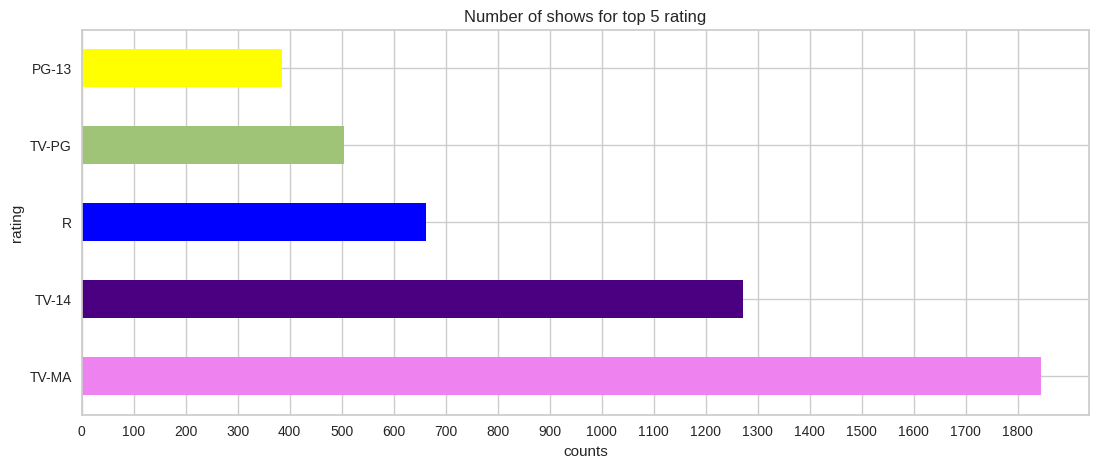

In [100]:
# Chart - 5 visualization code
#Top 5 rating with highest number of Movies
netflixVisualization.chart_5('movie',top=5)

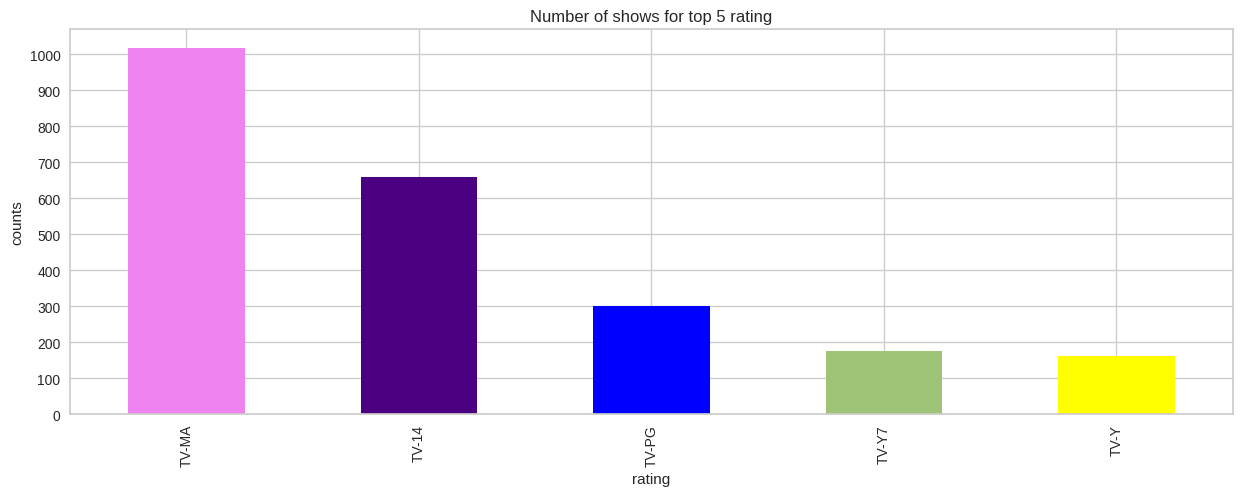

In [101]:
# Top 5 rating with highest number of TV Shows
netflixVisualization.chart_5('tv',top=5)

##### 1. Why did you pick the specific chart?

Bar chart is used to show the relationship between the categorical variables in distict mannar.
For representing the relation between Movie/TVshows years vs the Movie/TVshows ratings

##### 2. What is/are the insight(s) found from the chart?

Number of Movies for top 5 ratings:

TV-MA : 1845

TV-14 : 1272

R : 663

TV-PG : 505

PG-13 : 386

Numbere of TV Shows for top 5 ratings:

TV-MA : 1018

TV-14 : 659

TV-PG : 301

TV-Y7 : 176

TV-Y : 163

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight will help the producers or directors to predict which kind of ratings of movies/tvshows are most wathched and then they can produces movies/tvshows with that content

#### Chart - 6)Top 5 genres with highest number of shows

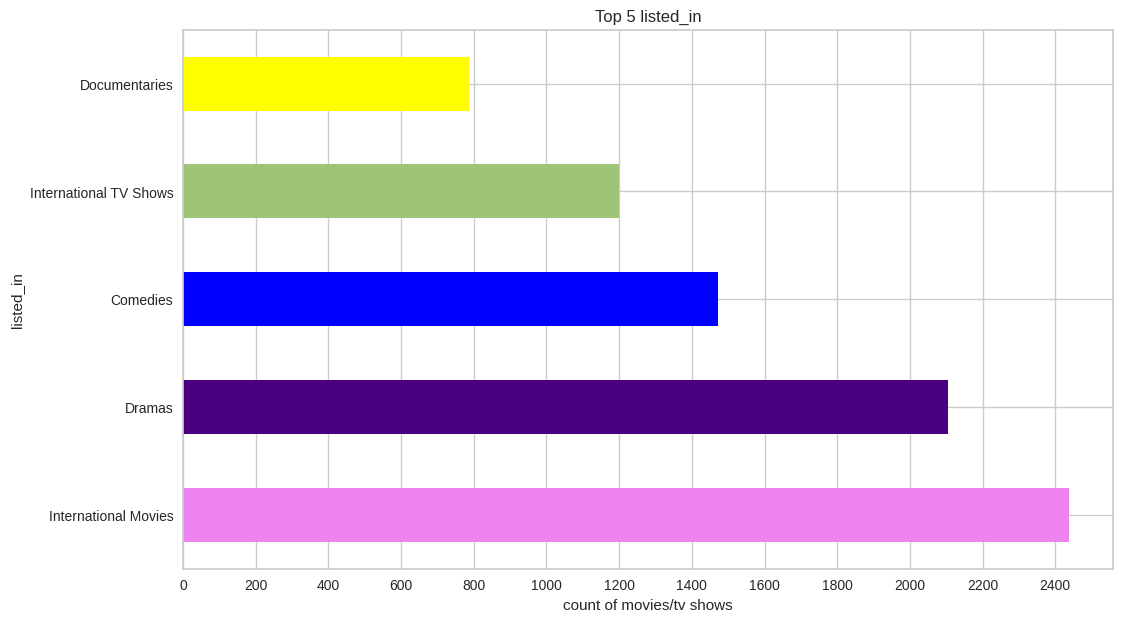

In [102]:
# Chart - 6 visualization code
#Top 5 genres with highest number of shows
plt.xticks(np.arange(0,2601,200))
netflixVisualization.getTopBarh('listed_in')

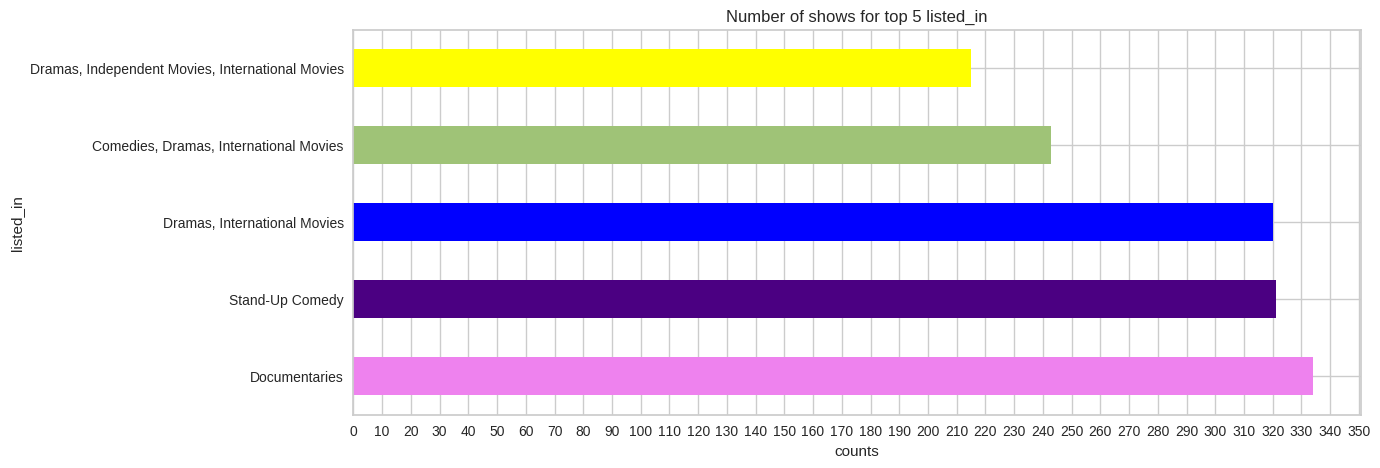

In [103]:
#Top 5 Listed_in with highest number of Movies
netflixVisualization.chart_6('movie',top=5)

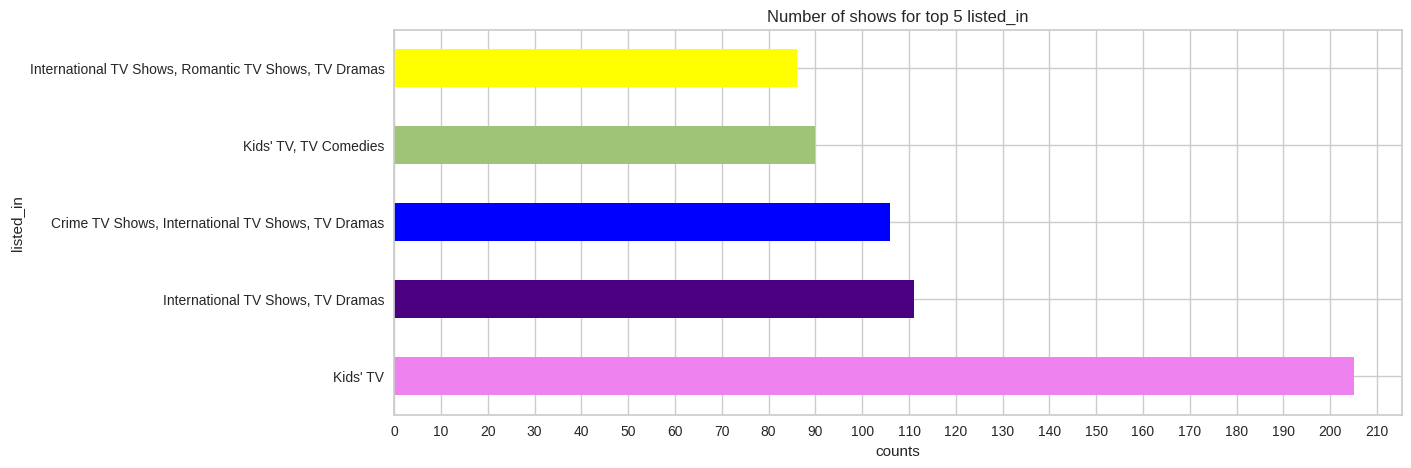

In [104]:
# Top 5 Listed_in with highest number of TV shows
netflixVisualization.chart_6('tv',top=5)

##### 1. Why did you pick the specific chart?

 A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see number of shows for each catagory of genres.
 So, i used bar charts.

##### 2. What is/are the insight(s) found from the chart?

  Here are the top 10 genres with the highest number of movies and TV shows:

**Movies:**

1. International Movies: 2437
2. Dramas: 2106
3. Comedies: 1471
4. Documentaries: 786
5. Stand-Up Comedy: 321
6. Comedies, Dramas, International Movies: 243
7. Dramas, Independent Movies, International Movies: 215

**TV Shows:**

1. International TV Shows: 1199
2. Kids' TV: 205
3. TV Dramas: 111
4. Crime TV Shows: 106
5. Romantic TV Shows: 86
6. TV Comedies: 90

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The observed trends in movie and TV show production provide valuable insights for predictions. Genres such as Documentaries, Stand-up Comedies, Dramas, International Movies, Comedies, and Independent Films consistently rank among the highest in terms of production numbers. This suggests a strong consumer preference for these genres. Similarly, for TV shows, Kids' TV, International TV Shows, TV Dramas, Crime TV Shows, and Romantic TV Shows emerge as the most prolific genres, indicating a high demand for content within these categories.

#### Chart - 7

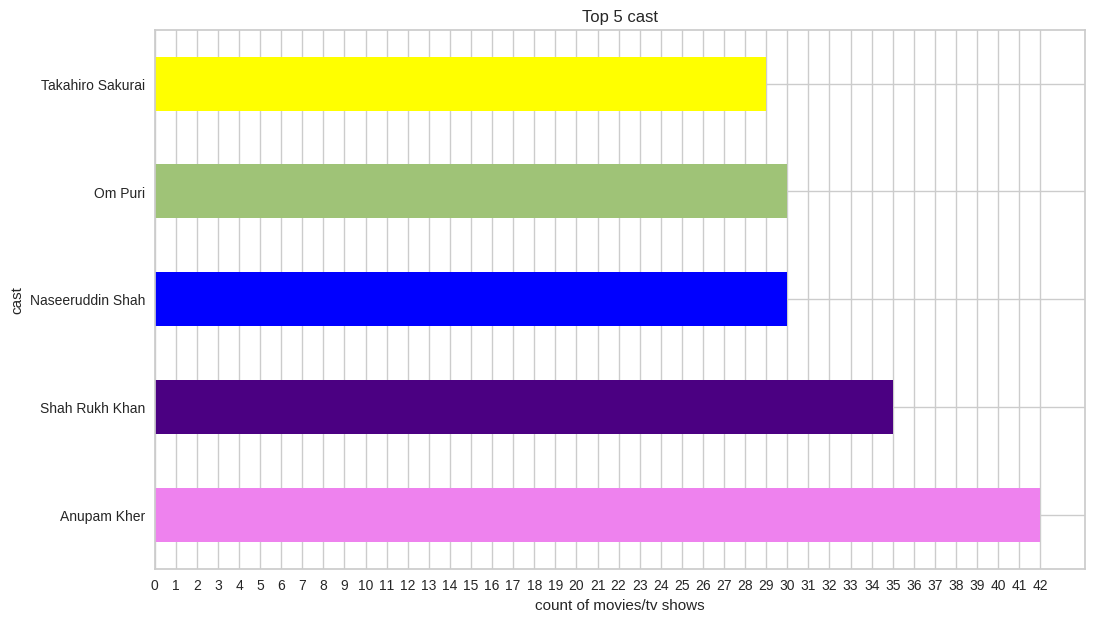

In [105]:
# Chart - 7 visualization code
#Top 5 Actors with highest number of shows
plt.xticks(np.arange(0,43,1))
netflixVisualization.getTopBarh('cast')

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data for each columns and I picked this chart to see top 10 actors with highest number of movies/tv show.

##### 2. What is/are the insight(s) found from the chart?

Here are the insights in the above chart

- Anupam Kher: Worked in about 42 movies (highest).
- Shahrukh Khan: Worked in about 37 movies (2nd highest).
- OM Puri: 3rd highest.
- Naseeruddin Shah: 4th highest.
- Takahiro Sakurai: 5th highest.
- Akshay Kumar: 6th highest.
- Paresh Rawal: 7th highest.
- Yuki Kaji: 8th highest.
- Boman Irani: 9th highest.
- Amitabh Bachchan: 10th highest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight will help to understand which artist or actor people would love to watch. Also it will help to choose the cast for the movies/tvshows.

And more about the predictions of the movies/tvshows failure or successs.

#### Chart - 8

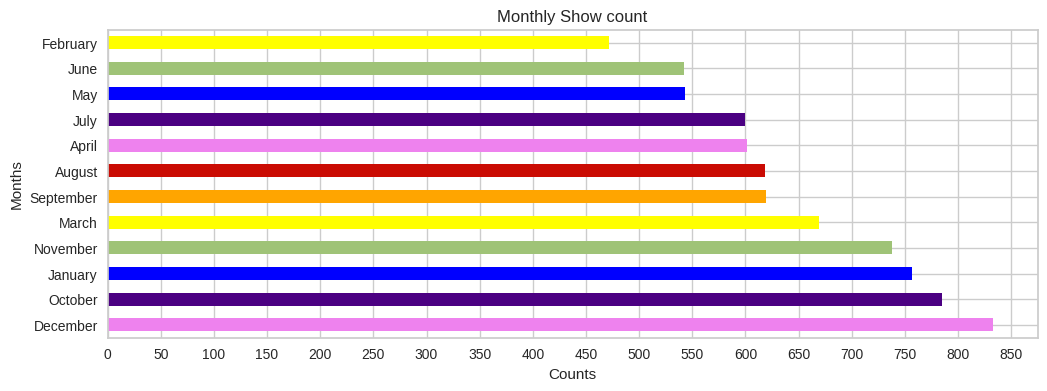

In [106]:
# Chart - 8 visualization code
netflixWrangling.getShowsPerMonth().plot.barh(figsize=(12,4),color=netflixVisualization.bar_colors)
plt.title('Monthly Show count')
plt.xlabel('Counts')
plt.ylabel('Months')
plt.xticks(np.arange(0,851,50))
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph is best for representing the variable changing with the time.
Here we are showing seasons and movines/tvshows being released. A bar chart shows value counts and frequency of the data for each column therefore I picked this chart to see counts of shows for each month.

##### 2. What is/are the insight(s) found from the chart?

I found that october, november, december and january have more than 700 highest number of movies are produced but every month there are more than 400 movies or TV Shows are being produced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here we can simpley see that most of the movies being released in winter season. The no of movies realesed in this time period is very high.

It can help to predict the release date of movies/tvshows.

#### Chart - 9) - Correlation Heatmap

I checked for the Correlation in the Data frame but there is no much in that so left it

#### Chart - 15 - Pair Plot

In [107]:
# Pair Plot visualization code

I also checked for a pairplot but it also shows not much in the plot because they has only one numerical value varialbe.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [108]:
# Handling Missing Values & Missing Value Imputation
df_copy = df.copy()
df_copy['cast'] = df_copy['cast'].fillna('unknown cast')
df_copy['country'] = df_copy['country'].fillna('unknown country')
df_copy.drop(columns=['director'],inplace=True)
df_copy = df_copy.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

First of all I replace nan with unknown cast and unknown country for columns cast and country. Then I dropped those rows which has less than or uqual to 10 nan values.

### 2. Handling Outliers

Before outlier treatment


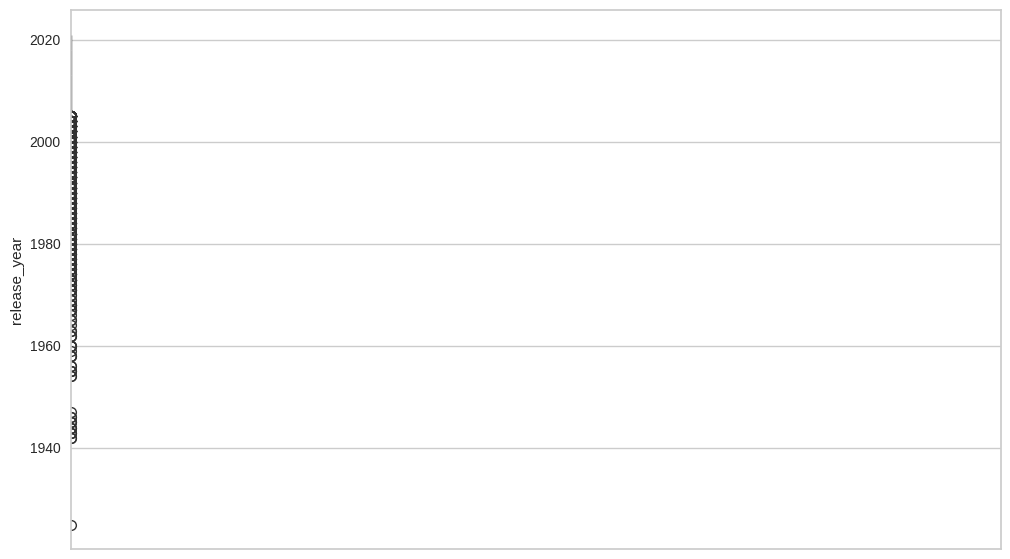

After iteration 1


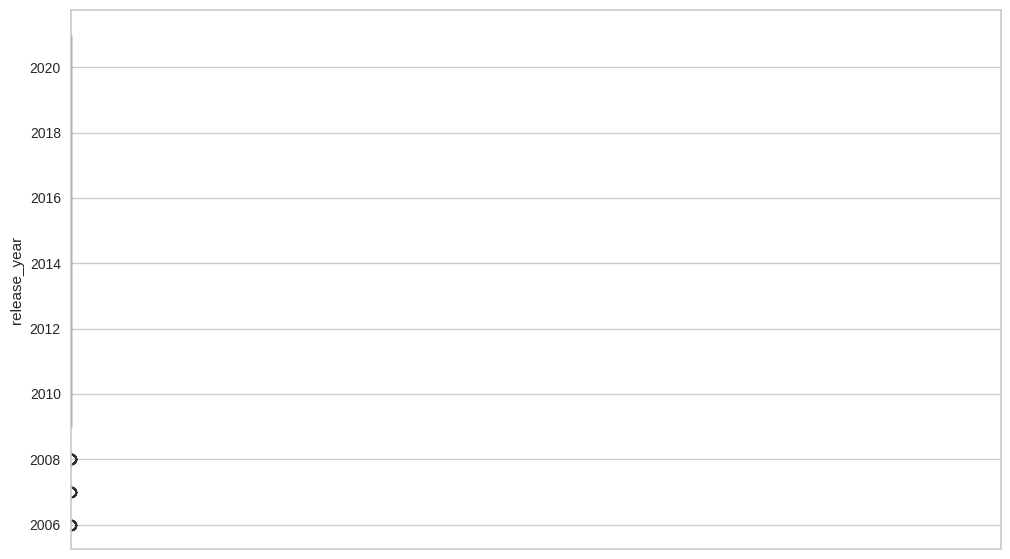

After iteration 2


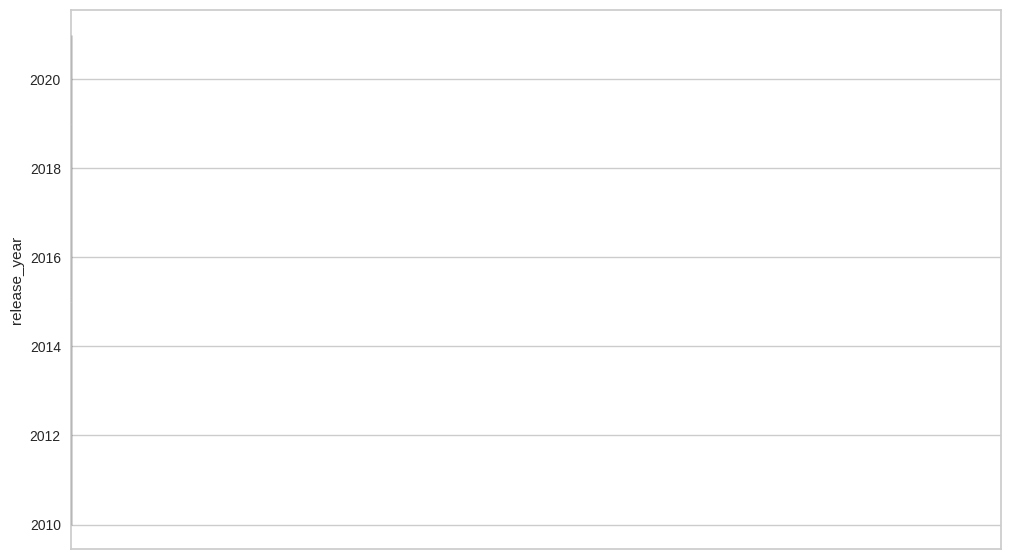

In [109]:
# Handling Outliers & Outlier treatments
# Function for displaying outliers
def displayOutliers():
  ''' This function display outliers '''
  sns.boxplot(df_copy['release_year'])
  plt.xticks(np.arange(1920,2031,10))
  plt.show()

# Function for outlier treatment
def treatOutliers(df_copy):
  ''' Function takes dataset and returns a dataset after treating the outliers '''
  q1 = df_copy['release_year'].quantile(.25)
  q3 = df_copy['release_year'].quantile(.75)
  iqr = q3-q1
  lower = q1-1.5*(iqr)
  df_copy = df_copy[df_copy['release_year'] > lower]
  return df_copy

# Treating the outlier by applying the above function
print('Before outlier treatment')
displayOutliers()
for i in range(2):
    print('After iteration '+str(i+1))
    df_copy=treatOutliers(df_copy)
    displayOutliers()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used q1-1.5iqr technique to remove uni-variate outliers because the column release_year had outliers.

### 3. Categorical Encoding

In [110]:
# Encode your categorical columns
df_copy['movie'] = df_copy['type'].apply(lambda x: 1 if x=='Movie' else 0)
df_copy['tv_show'] = df_copy['type'].apply(lambda x: 0 if x=='Movie' else 1)
df_copy.drop(columns=['type'],inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding technique is not biased to a particular variable therefore I did one hot encoding of column type and created new columns movie and tv_show.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [111]:
# Combining the textual columns and assigning it to a new variable
df_copy['cluster_col'] = (df_copy['cast']+' '+df_copy['listed_in']+' '+' '+df_copy['description'])

#### 2. Lower Casing

In [112]:
# Lower Casing
# Function to convert in lower case
def lower_casing(text):
  ''' function takes string and conver it to lower case '''
  list_of_words = [letter.lower() for letter in text.split()]
  return ' '.join(list_of_words)

df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 3. Removing Punctuations

In [113]:
# Remove Punctuations
def rem_punctuation(text):
  '''
  takes text and removes punctuations
  '''
  return ''.join([t for t in text if t not in string.punctuation])

# Remove Punctuations
df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 4. Removing URLs & Removing words and digits contain digits.

In [114]:
# Remove URLs & Remove words and digits contain digits
def removeDigits(text):
  '''
  takes text and removes digits
  '''
  nums = ['0','1','2','3','4','5','6','7','8','9']
  return ''.join([t for t in text if t not in nums])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeDigits)

# Function to remove url
def removeUrls(text):
  '''
  Takes a texts and removes url
  '''
  return ' '.join([t for t in text.split('.') if t not in ['com','www','https//']])

# Remove URLs & Remove words and digits contain digits
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeUrls)

#### 5. Removing Stopwords & Removing White spaces

In [115]:
# Remove Stopwords
nltk.download('stopwords')
# Function to remove stop words
def removeStopWords(text):
  '''
  Takes text and removes stop words
  '''
  stopwords_ = nltk.corpus.stopwords.words('english')
  return ' '.join([t for t in text.split() if t not in stopwords_])

# Remove Stopwords
print('Length before removing stopwords ',len(df_copy['cluster_col'][0]))
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeStopWords)
print('Length after removing stopwords ',len(df_copy['cluster_col'][0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Length before removing stopwords  361
Length after removing stopwords  317


In [116]:
# Remove White spaces
def removeWhiteSpace(text):
  '''
  takes text and removes white spaces
  '''
  return ' '.join([t for t in text.split(' ')])
# Remove White spaces
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeWhiteSpace)

#### 6. Tokenization

In [117]:
# Tokenization
# Vectorization Function
def getVectorized(df):
  ''' Function takes dataset and apply vectorization '''
  count_vectorizer = CountVectorizer()
  # Fitting the count vectorizer
  count_vectorizer.fit_transform(df['cluster_col'])
  # Collecting the vocabularies
  return count_vectorizer.vocabulary_.items()

# Applying the  above function and showing the features
dictionary_cluster_col = getVectorized(df_copy)
dictionary_cluster_col

dict_items([('joão', 17961), ('miguel', 23124), ('bianca', 4066), ('comparato', 7333), ('michel', 23063), ('gomes', 13872), ('rodolfo', 30187), ('valente', 37584), ('vaneza', 37655), ('oliveira', 25734), ('rafael', 28665), ('lozano', 21047), ('viviane', 38188), ('porto', 27761), ('mel', 22763), ('fronckowiak', 12834), ('sergio', 32002), ('mamberti', 21690), ('zezé', 39945), ('motta', 23889), ('celso', 6124), ('frateschi', 12726), ('international', 16885), ('tv', 36951), ('shows', 32686), ('dramas', 9993), ('sci', 31609), ('fi', 12157), ('fantasy', 11830), ('future', 12982), ('elite', 10706), ('inhabit', 16748), ('island', 17092), ('paradise', 26496), ('far', 11834), ('crowded', 8062), ('slums', 33229), ('get', 13488), ('one', 25806), ('chance', 6279), ('join', 17826), ('saved', 31374), ('squalor', 33865), ('demián', 8922), ('bichir', 4080), ('héctor', 16238), ('bonilla', 4587), ('oscar', 26006), ('serrano', 32022), ('azalia', 2835), ('ortiz', 25994), ('octavio', 25520), ('carmen', 5847

In [118]:
# Total features
print('Total Features ',len(dictionary_cluster_col))

Total Features  40255


#### 7. Text Normalization

In [119]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Stemming finction
def stemming(text):
  ''' Takes text and returns after stemming. '''
  stemmer = SnowballStemmer('english')
  return ' '.join([stemmer.stem(t) for t in text.split()])

# Function to assign words and counts from dictionary to list
def assignWordsAndCountsToList(dictionary):
  ''' Takes dictionary and return list of words and counts. '''
  vocab_cluster = [ ]
  vocab_counts_cluster = []
  for key , value in dictionary:
    vocab_cluster.append( key )
    vocab_counts_cluster.append( value )
  return vocab_cluster,vocab_counts_cluster

# Function to display word count
def displayTop20Words(df):
  '''  Displays top 20 words. '''
  plt.barh(df.head(20)['word'].values,df.head(20)['count'].values)
  plt.xlabel('Count')
  plt.ylabel('Words')
  plt.show()

In [120]:
#without stemming
# Assigning words and counts to lists
vocab_cluster,vocab_counts_cluster = assignWordsAndCountsToList(dictionary_cluster_col)
# Words and counts before stemming
df_cluster_before_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_before_stem.head(20).T

,22875,38911,36955,33549,18653,18651,26998,25290,20729,34429,16369,16404,38609,23850,19872,21973,22422,22025,27576,27250
word,ṣọpẹ,żurawski,żulewska,źak,şükrü,şükran,şçil,ştar,şler,şiten,şinasi,şimşek,şeref,şenolsun,şenocak,şenhuy,şendil,şenay,şen,şebnem
count,40254,40253,40252,40251,40250,40249,40248,40247,40246,40245,40244,40243,40242,40241,40240,40239,40238,40237,40236,40235


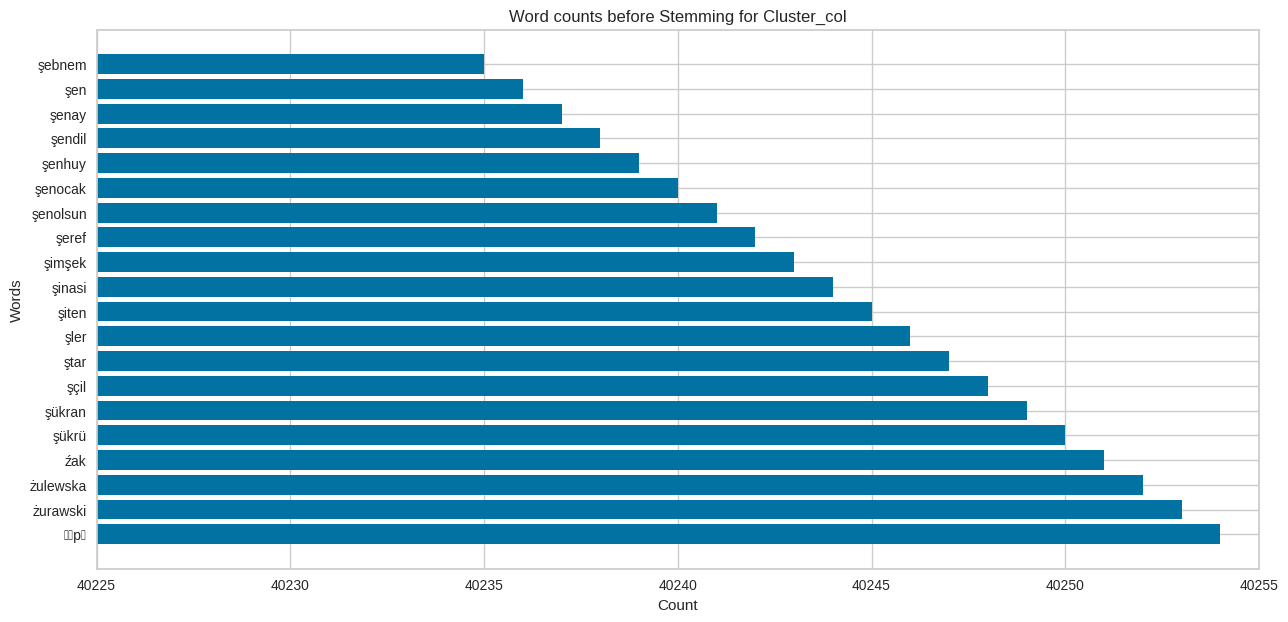

In [121]:
# Plotting top 10 words
plt.rcParams['figure.figsize'] = (15,7)
plt.xlim(40225,40255)
plt.title('Word counts before Stemming for Cluster_col')
displayTop20Words(df_cluster_before_stem)

##### Which text normalization technique have you used and why?

Stemming removes the extra tail of the words like coming converted to come. I am using this technique to remove the tail of the words.

In [122]:
#with stemming
# Stemming and assigning words to a variable
df_copy['cluster_col'] = df_copy['cluster_col'].apply(stemming)
dictionary_cluster_col = getVectorized(df_copy)
# Assigning vocabularies and counts to the lists for listed_in.
vocab_cluster , vocab_counts_cluster = assignWordsAndCountsToList(dictionary_cluster_col)
# Words and counts after stemming
df_cluster_after_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_after_stem.head(20).T


,21089,35984,34145,30960,17217,17215,24865,23307,19104,31776,15117,15153,35700,21984,18315,20269,20673,20314,25416,25104
word,ṣọpẹ,żurawski,żulewska,źak,şükrü,şükran,şçil,ştar,şler,şiten,şinasi,şimşek,şeref,şenolsun,şenocak,şenhuy,şendil,şenay,şen,şebnem
count,37258,37257,37256,37255,37254,37253,37252,37251,37250,37249,37248,37247,37246,37245,37244,37243,37242,37241,37240,37239


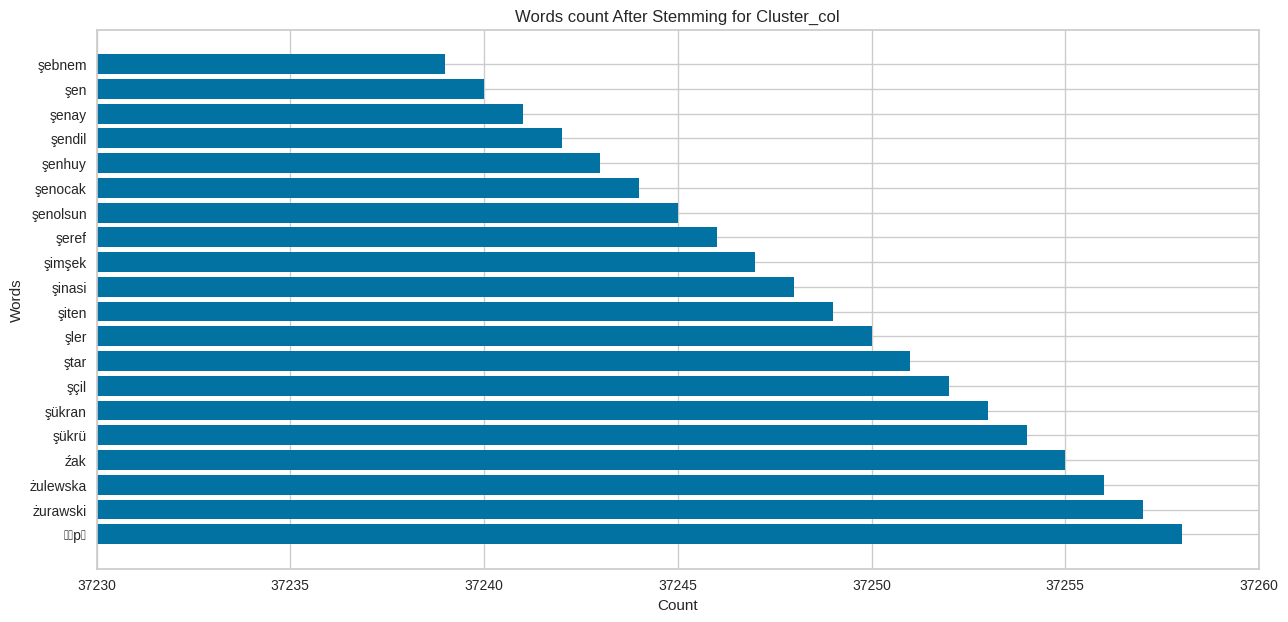

In [123]:
# Plotting top 10 words
plt.xlim(37230,37260)
plt.title('Words count After Stemming for Cluster_col')
displayTop20Words(df_cluster_after_stem)

#### 8. Text Vectorization

In [124]:
# Vectorizing Text
# Function to get number from proportion
def proportionToNumber(proportion,data):
  return (proportion * data)/100

num = int(round(proportionToNumber(1,len(df_copy)),0))
# Vectorizing Text - discarding features which are available less then 1% of the dataset and more than 90%.
tfidfvectorizer = TfidfVectorizer(min_df=num,max_df=.9)
features_array = tfidfvectorizer.fit_transform(df_copy['cluster_col']).toarray()
features_names = tfidfvectorizer.get_feature_names_out()
df_copy.shape

(6596, 13)

In [125]:
# Making dataframe with vocabularies
X = pd.DataFrame(features_array,columns=features_names)
X.shape

(6596, 396)

##### Which text vectorization technique have you used and why?

I used tfidfVectorization technique.

### 5.Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Since there are a huge number of features and most of them are containing zeros therefore we need to do dimentionality reduction.

In [126]:

# Dimensionality Reduction (If needed)
pca = PCA(n_components=.975)
pca.fit(X.values)
X2 = pca.transform(X.values)
len(X2[0])

364

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used principal component analysis. The reason behind it is High-dimensional data can make it harder to visualize, analyze, and model effectively. PCA helps in reducing the number of dimensions while capturing the most important variations in the data.

## ***7. ML Model Implementation***

### ML Model - 1 K-Means clusturing

In [127]:
# Function to display clusters
def displayClusters(X,labels,centers):
  ''' Takes data, labels and centers and plots the scatter chart '''
  plt.scatter(X2[: , 0] , X2[: , 1] , c=labels,s=10,cmap='viridis')
  plt.scatter(centers[:, 0],centers[:, 1],c='red',s=15)
  plt.show()

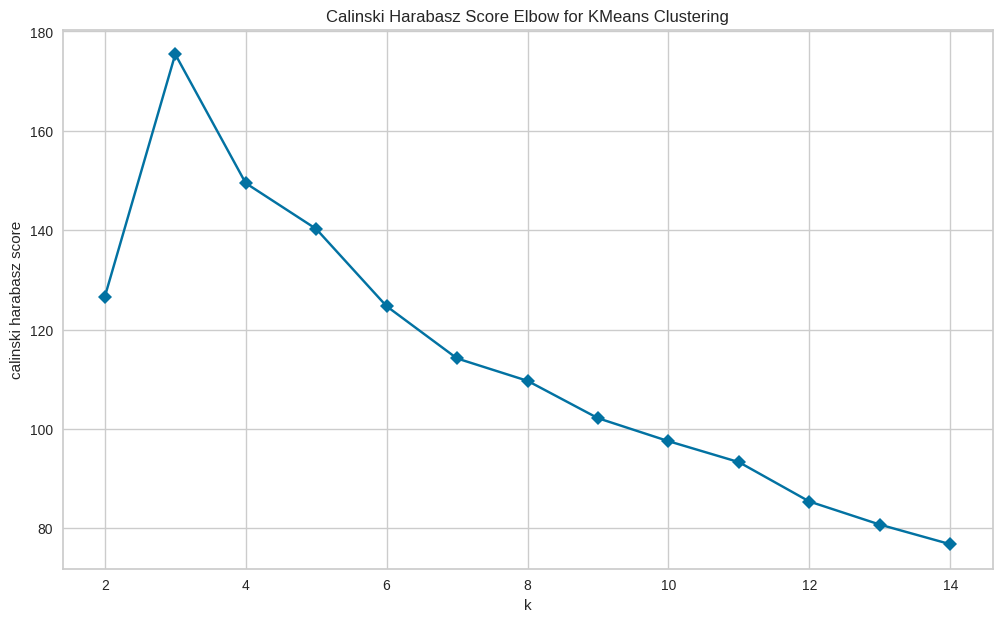

In [128]:
# ML Model - 1 Implementation - KElbowVisualization
plt.rcParams['figure.figsize'] = (12,7)
model = KMeans(random_state=10)
visualizer = KElbowVisualizer(model,k=(2,15),metric='calinski_harabasz',timings=False,locate_elbow=False)
# Fit the Algorithm
visualizer.fit(X2)
# Predict on the model
visualizer.show()
plt.show()

In [129]:
# Silhouette Score for each cluster
n_clusters_range = np.arange(2,15)
for c in n_clusters_range:
    clusterer = KMeans(n_clusters=c,random_state=10)
    pred = clusterer.fit_predict(X2)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X2,pred)
    inertia = clusterer.inertia_
    print('for cluster ',c,' the silhouette score is ',score)
# plotting the results:
    displayClusters(X2,pred,centers)

Output hidden; open in https://colab.research.google.com to view.

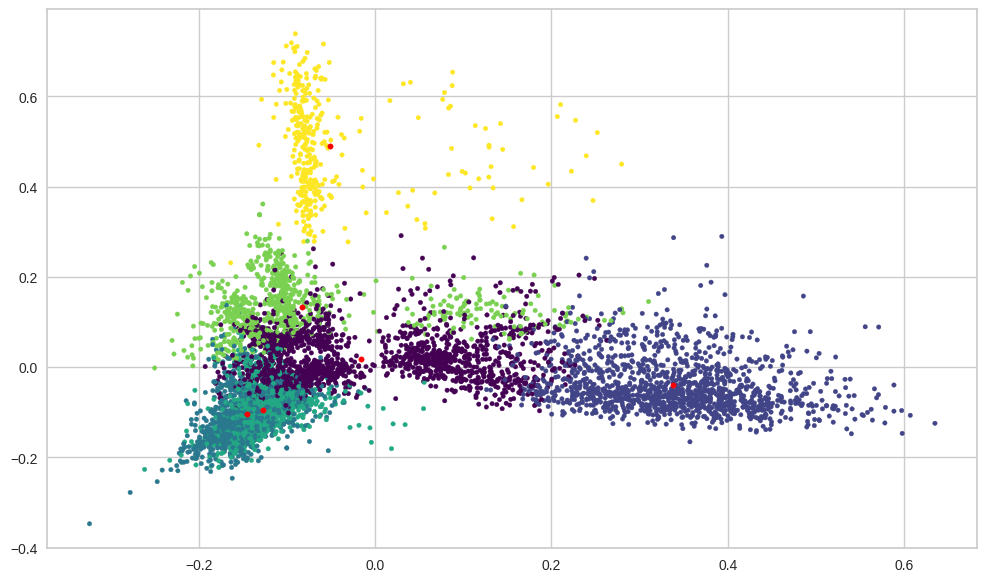

In [130]:
# Silhouette score is good at 6 clusters therefore I am taking n_clusters = 6.
kmeans= KMeans(n_clusters=6, random_state=10,max_iter=100)
kmeans.fit(X2)

# predict the labels of clusters.
labels = kmeans.fit_predict(X2)
centers = kmeans.cluster_centers_
# plotting the results:
displayClusters(X2,labels,centers)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

From KElbow visualization I found that after n_cluster = 6 the slop is very close to constant and silhouette score is also high that is .046

#### 2. Cross- Validation & Hyperparameter Tuning

In [131]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
mdl = KMeans()
params ={'n_clusters':[6],'random_state':[10],'max_iter':[15,20],'tol':[.01,.1]}
kmeans_gridcv = GridSearchCV(mdl,param_grid=params,verbose=2,cv=2)
# Fit the Algorithm
kmeans_gridcv.fit(X2)
# Predict on the model
best_kmeans = kmeans_gridcv.best_estimator_
labels = best_kmeans.predict(X2)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.01; total time=   0.2s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.01; total time=   0.2s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.1; total time=   0.2s
[CV] END max_iter=15, n_clusters=6, random_state=10, tol=0.1; total time=   0.2s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.01; total time=   0.2s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.01; total time=   0.2s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.1; total time=   0.2s
[CV] END max_iter=20, n_clusters=6, random_state=10, tol=0.1; total time=   0.2s


In [132]:
kmeans_gridcv.best_params_

{'max_iter': 20, 'n_clusters': 6, 'random_state': 10, 'tol': 0.01}

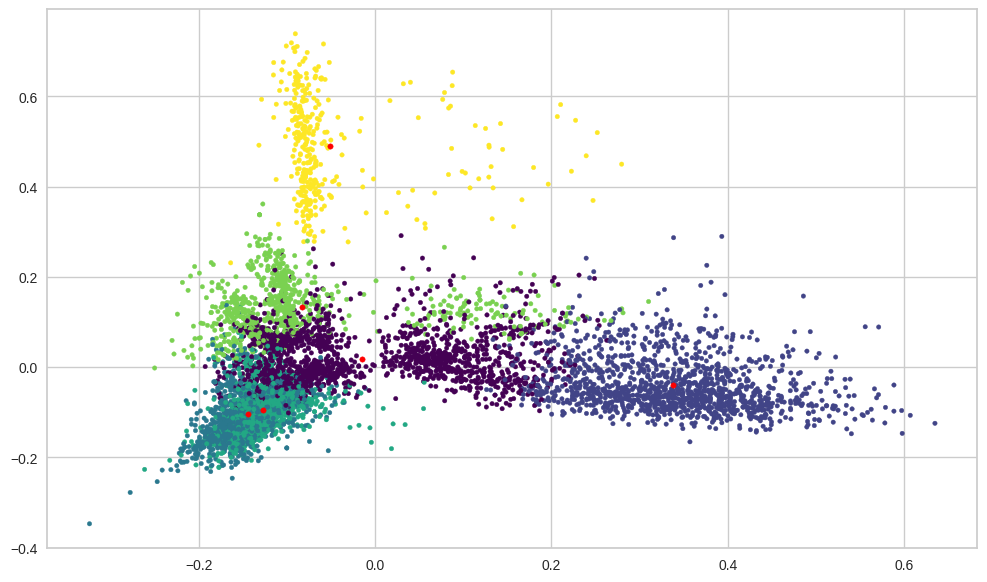

In [133]:
# plotting the results:
centers = best_kmeans.cluster_centers_
plt.scatter(X2[: , 0] , X2[: , 1] , c=labels,s=10,cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],c='red',s=15)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I think cross validation is not needed for clustering.
I used n_clusters and max_iter hyper parameters to tune the parameters and I did not found any improvement.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No there is no improvement in it.


### ML Model - 2 Hierarchical clustering

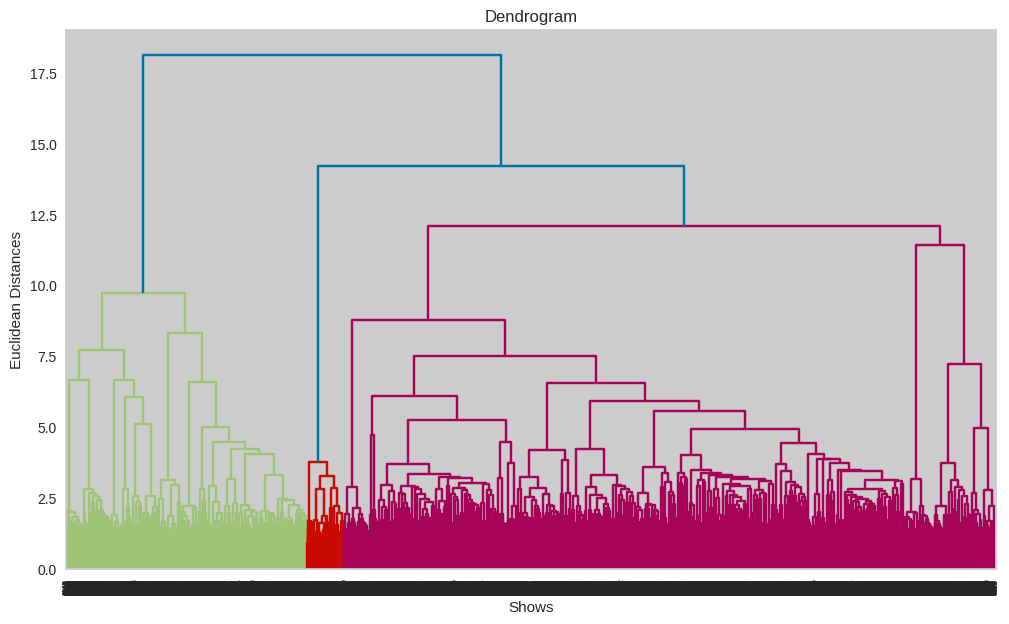

In [134]:
# Using the dendogram to find the optimal number of clusters - and find largest vertical distance we can make without crossing any other horizontal line
linkage =sch.linkage(X2, method = 'ward')
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrogram')
plt.xlabel('Shows')
plt.ylabel('Euclidean Distances')
plt.show()

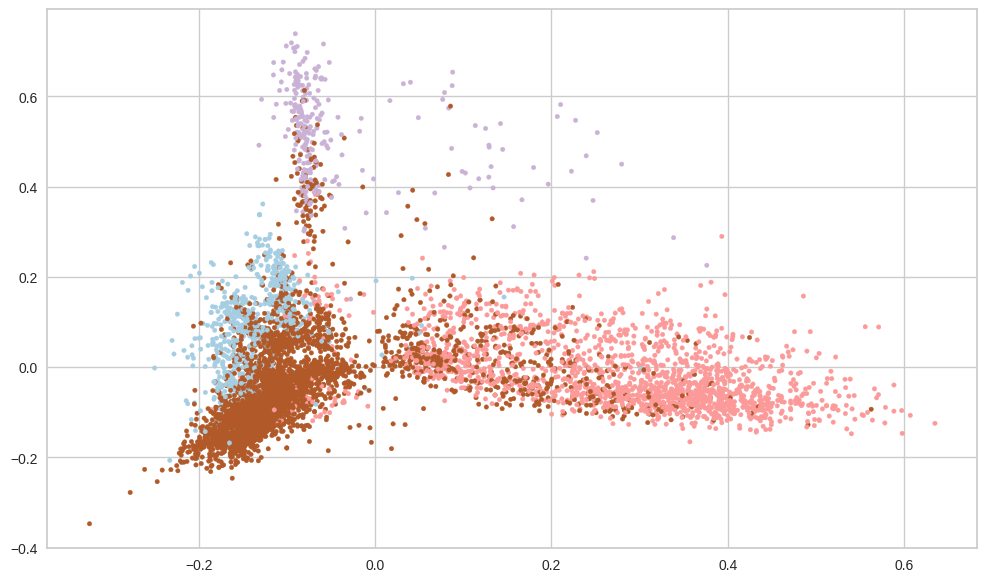

In [138]:
# Fitting hierarchical clustering to the mall dataset
# Average and single linkage is not good
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X2)
# Plotting the results:
plt.scatter(X2[: , 0] , X2[: , 1] , c=y_hc,s=10,cmap='Paired')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Since there are lot of noice in the dataset therefore the result is not good but for n_clusters = 4 it seems better.

### ML Model - 3 Density-Based Spatial Clustering of Applications with Noise

In [139]:
# ML Model - 3 Implementation
dbscan = DBSCAN(eps=.91,min_samples=15,algorithm='auto')
# Fit the Algorithm
dbscan.fit(X2)
# Predict on the model
ypred = dbscan.fit_predict(X2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

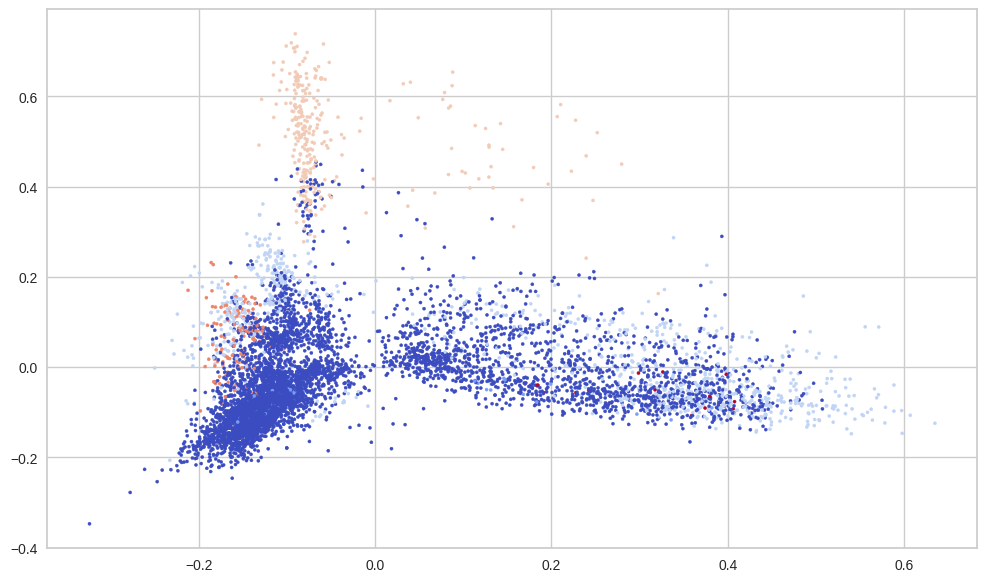

In [140]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
plt.scatter(X2[:,0], X2[:,1], c=ypred,s=5,cmap='coolwarm')
plt.show()

Dbscan might not be the most suitable choice when dealing with datasets that contain a substantial amount of noise. In such scenarios, the algorithm can exhibit certain limitations that become apparent in the resulting cluster formations.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 Since we have mentioned using PCA to reduce dimensionality, the Euclidean distance is often used in PCA-transformed space. The principal components are linear combinations of the original features, and Euclidean distance can still provide a reasonable measure of similarity or dissimilarity in this transformed space.









### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Certainly, choosing K-Means for your clustering task because it's fast and providing superior results compared to other methods is a practical and valid decision.
I would choose Kmeans because the model is fast and giving better result than all the others.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Certainly, we have  employed the K-Means clustering algorithm for this project. K-Means is an iterative algorithm that groups data points into clusters by minimizing the sum of squared distances between data points and the centroids of their assigned clusters. It partitions the data based on similarity and is well-suited for numerical features.

# **Conclusion**

Your description provides a clear overview of the dataset and the data preprocessing and clustering steps you've undertaken. Here's a summary of the key points you've mentioned:

**Dataset Size:** The dataset contains 7,787 entries and 12 attributes.

**Missing Values:** Several columns have missing values, with varying percentages: 'director' (30.68%), 'cast' (9.22%), 'country' (6.51%), 'date_added' (0.13%), and 'rating' (0.09%).

**Movies vs. TV Shows:** After filtering for movies and TV shows, you have two datasets: one with 5,377 entries and the other with 2,410 entries, both having 14 attributes.

**Feature Vectorization:** Following feature vectorization, you have a substantial number of features, totaling 40,255.

**Dimensionality Reduction:** Dimensionality reduction techniques have been applied, reducing the feature count to 364.

**Clustering:**  KMeans clustering with 6 clusters has been chosen, showing a high silhouette score of 0.046. Agglomerative clustering appears promising but is less effective with a larger number of clusters. DBSCAN, on the other hand, produces larger clusters due to significant noise in the dataset, making it unsuitable for this specific case.

This information provides a clear picture of your data preprocessing and clustering efforts, allowing for a better understanding of the data analysis process you've undertaken. The choice of KMeans with 6 clusters and the consideration of silhouette scores for evaluation are particularly informative.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***